## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression

from scipy.stats import spearmanr

import tensorflow as tf

from copy import deepcopy

In [4]:
np.set_printoptions(suppress=True)

## Data Preparation

In [20]:
# Import the data

data = pd.read_csv("data/stress_factors.csv")


In [21]:
# Create factorized version
# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [22]:
# Organize column names

predictors = ["Sleep_Quality","Weekly_Headaches","Academic_Performance","Study_Load","Weekly_Extracurriculars"]
targets = ["Stress_Level"]

In [23]:
# Assert that there are no NAs
assert(data.isna().sum().sum() == 0)

## Data Summary Statistics

In [24]:
# Basic summary
summary = data.describe()

# Add MADs
sum_columns = summary.columns
mads = [np.median(np.abs(data[column] - data[column].median())) for column in sum_columns]

summary.loc['mad'] = mads

# Formatting
summary = round(summary, 3)


In [25]:
# Display summary
summary

,Sleep_Quality,Weekly_Headaches,Academic_Performance,Study_Load,Weekly_Extracurriculars,Stress_Level
count,520.000,520.000,520.000,520.000,520.000,520.000
mean,3.125,2.183,3.327,2.750,2.683,2.875
std,1.099,1.247,1.061,1.372,1.471,1.358
min,1.000,1.000,1.000,1.000,1.000,1.000
25%,2.000,1.000,3.000,2.000,1.000,2.000
50%,3.000,2.000,3.000,2.500,3.000,3.000
75%,4.000,3.000,4.000,4.000,4.000,4.000
max,5.000,5.000,5.000,5.000,5.000,5.000
mad,1.000,1.000,1.000,1.500,1.000,1.000


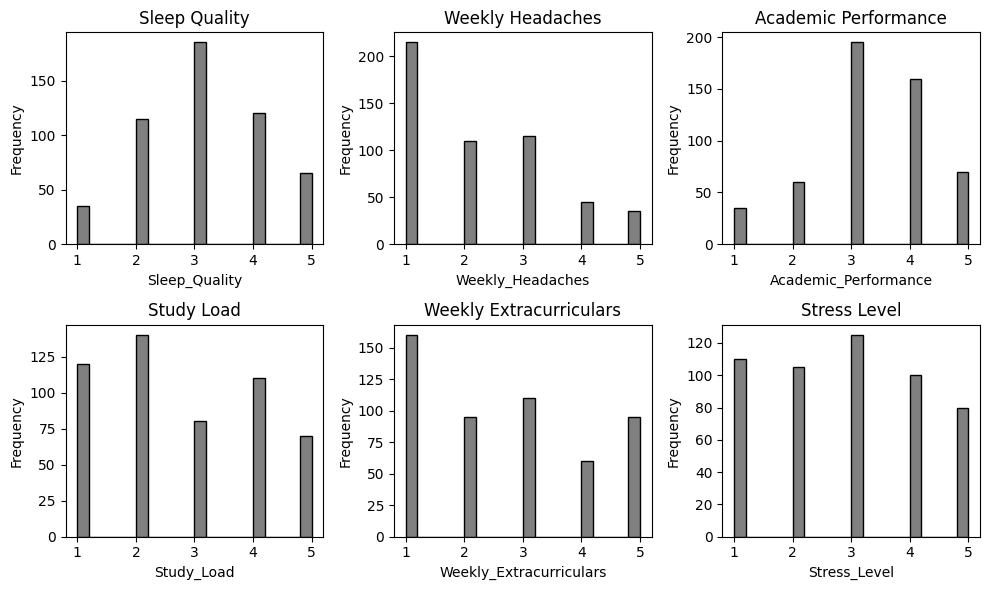

In [30]:
# Set number of columns in the grid
data_to_plot = data
n_cols = 3
n_rows = int(np.ceil(len(data_to_plot.columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()  # Flatten in case it's 2D

# Plot histograms
for i, col in enumerate(data_to_plot.columns):
    axes[i].hist(data_to_plot[col], bins=20, color='grey', edgecolor='black')
    axes[i].set_title(f'{col.replace("_", " ")}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Factor Analysis

### Factor Analysis Pre-Work

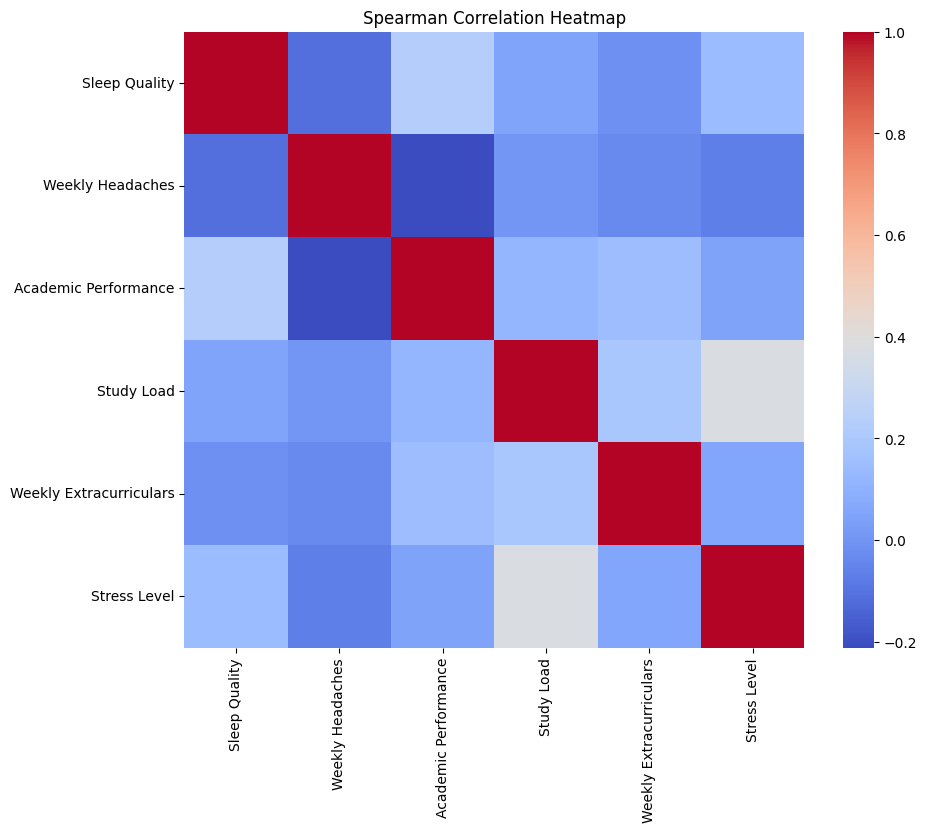

In [34]:
# Compute Spearman correlation matrix
corr, _ = spearmanr(data_scaled)

# Create a heatmap
labels = list(map(lambda x: x.replace("_", " "), data_encoded.columns))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.title('Spearman Correlation Heatmap')
plt.show()

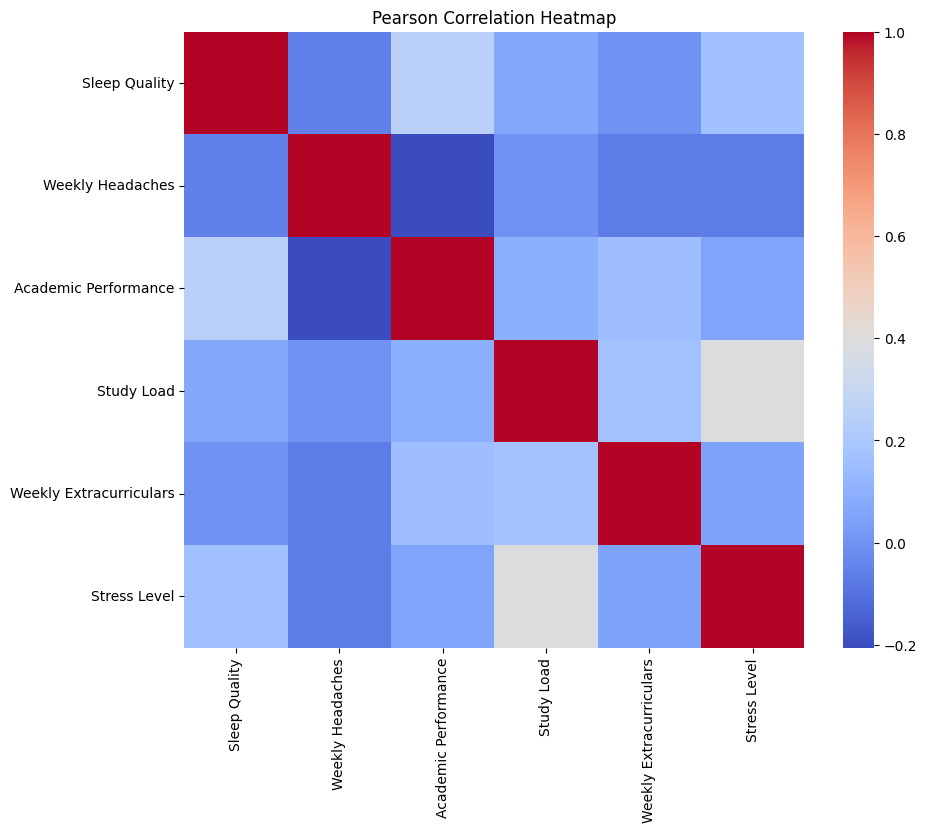

In [37]:
# Compute Pearson correlation matrix
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
corr = data_scaled_df.corr(method='pearson')

# Create a heatmap
labels = list(map(lambda x: x.replace("_", " "), data_encoded.columns))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.title('Pearson Correlation Heatmap')
plt.show()

### Factor Analysis Fits

### Factor Analysis Evaluations

## Regression Models

### Regression Model Fits

### Regression Model Evaluations